<a href="https://colab.research.google.com/github/NivyaSreeAvula/hetro-repo/blob/master/EDA_for_cowin_jan_dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import io
import pandas as pd
import string
import spacy #natural language processor
import nltk #natural language toolkit
nltk.download('stopwords')
import seaborn as sns
import numpy as np
import plotly.express as px
import pylab
import re
from warnings import simplefilter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import random
from textblob import TextBlob
import unicodedata

import matplotlib.pyplot as plt
%matplotlib inline


import nltk
from nltk.util import ngrams
from collections import Counter

pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import files
uploaded = files.upload()
raw = pd.read_csv(io.BytesIO(uploaded['tweets_dedup_jan_dec.csv']))

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
path = "/content/drive/MyDrive/Colab Notebooks/tweets_dedup_jan_dec.csv"
raw = pd.read_csv(path, encoding = "ISO-8859-1",engine='python')  #trying to eliminate "can't decode byte 0xa0" errors

In [10]:
raw.head()

,Unnamed: 0,author_id,created_at,lang,like_count,quote_count,text,tweet_id,retweet_count,user_username,sourcetweet_type,sourcetweet_text
0,1,1338759702008614915,2021-01-02T13:50:34.000Z,tl,0,0,@6waificee LAKAS NAMAN NUNG COWIN WBAHHAHA,1345366878680616961,0,skyemrtnz,NaN,NaN
1,2,978957208686755841,2021-01-02T13:49:32.000Z,en,0,0,"@PriyankaJShukla @MoHFW_INDIA @drharshvardhan @ChhattisgarhCMO Hi, can you please share the deta...",1345366619476828165,0,ManogharanRam,NaN,NaN
2,3,102706517,2021-01-02T13:34:38.000Z,en,0,0,@indiatvnews Could not find #CoWIN #CowinApp on play store.. can you please share the link to do...,1345362872092643330,0,sanjeevXarora,NaN,NaN
3,4,55193817,2021-01-02T13:28:18.000Z,hi,3,0,Corona Vaccine <U+0932><U+0917><U+0935><U+093E><U+0928><U+0947> <U+0915><U+0947> <U+0932><U+093F...,1345361274989731841,1,PatrikaNews,NaN,NaN
4,5,921981573297328128,2021-01-02T13:03:35.000Z,en,2,0,@Sideshow_Matt @Caorthannach Cowin lush!,1345355055873060865,0,LeilaTavibird,NaN,NaN


#EDA 


In [11]:
print("total number of data received ")
print(f'Number of rows in twitter data: {raw.shape[0]}')
print(f'Number of columns in twitter data :{raw.shape[1]}' )
print(f'Number of values in twitter data:{ raw.count().sum()}')
print(f'Number missing values in twitter data:{sum(raw.isna().sum())}' )

total number of data received 
Number of rows in twitter data: 635587
Number of columns in twitter data :12
Number of values in twitter data:6355870
Number missing values in twitter data:1271174


In [12]:
raw.describe()

,Unnamed: 0,author_id,like_count,quote_count,tweet_id,retweet_count,sourcetweet_type,sourcetweet_text
count,635587.000000,6.355870e+05,635587.000000,635587.000000,6.355870e+05,635587.000000,0.0,0.0
mean,317794.000000,1.091820e+18,4.168306,0.063710,1.412805e+18,0.839759,NaN,NaN
std,183478.307109,5.427855e+17,179.183101,2.825672,1.839734e+16,29.856717,NaN,NaN
min,1.000000,3.160000e+03,0.000000,0.000000,1.344803e+18,0.000000,NaN,NaN
25%,158897.500000,1.096395e+18,0.000000,0.000000,1.402112e+18,0.000000,NaN,NaN
50%,317794.000000,1.396819e+18,0.000000,0.000000,1.413709e+18,0.000000,NaN,NaN
75%,476690.500000,1.399366e+18,0.000000,0.000000,1.424201e+18,0.000000,NaN,NaN
max,635587.000000,1.476102e+18,99448.000000,1148.000000,1.476336e+18,13771.000000,NaN,NaN


In [13]:
raw.drop(columns=["Unnamed: 0",'author_id', "tweet_id", "user_username", "sourcetweet_type","sourcetweet_text"], inplace= True)

In [14]:
print("total number of data received ")
print(f'Number of values in twitter data:{ raw.count().sum()}')
print(f'Number missing values in twitter data:{sum(raw.isna().sum())}' )

total number of data received 
Number of values in twitter data:3813522
Number missing values in twitter data:0


##Things to do 

1.   see how many languages are in this data set
2.   Top 10 languages
3.   separate en tweets and process it






In [15]:
le= pd.value_counts(raw['lang'].sort_values(ascending = False)).rename_axis('unique_languages').to_frame('counts')

In [16]:
le= le.reset_index()
le

,unique_languages,counts
0,en,528732
1,tl,35072
2,hi,34637
3,ro,5242
4,in,3851
5,et,3638
6,und,3021
7,fr,2923
8,qme,2756
9,mr,1927


In [20]:
top10lang= le.head(10)
print(top10lang)

  unique_languages  counts
0               en  528732
1               tl   35072
2               hi   34637
3               ro    5242
4               in    3851
5               et    3638
6              und    3021
7               fr    2923
8              qme    2756
9               mr    1927


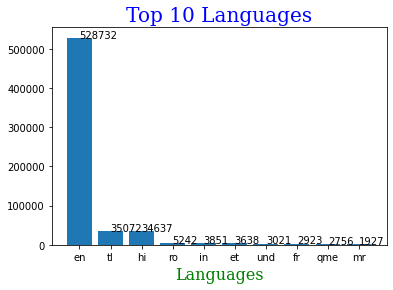

In [112]:
font = {'family':'serif','color':'blue','size':20}
font1 = {'family':'serif','color':'green','size':16}

plt.bar('unique_languages', 'counts', data=top10lang, width=0.8, bottom=None,  align='center')
plt.title("Top 10 Languages", fontdict = font)
plt.xlabel('Languages', fontdict=font1)
for x, y, text in zip(top10lang['unique_languages'],top10lang['counts'], top10lang['counts']):
    plt.text(x, y, text, fontsize= 10)
plt.savefig('top10.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
en = raw.loc[raw.lang== "en"]

In [23]:
print(en.head())
print(f'Number of rows in twitter data: {en.shape[0]}')
print(f'Number of values in twitter data:{en.count().sum()}')

                 created_at lang  like_count  quote_count  \
1  2021-01-02T13:49:32.000Z   en           0            0   
2  2021-01-02T13:34:38.000Z   en           0            0   
4  2021-01-02T13:03:35.000Z   en           2            0   
6  2021-01-02T12:28:17.000Z   en           3            0   
7  2021-01-02T12:18:09.000Z   en           0            0   

                                                                                                  text  \
1  @PriyankaJShukla @MoHFW_INDIA @drharshvardhan @ChhattisgarhCMO Hi, can you please share the deta...   
2  @indiatvnews Could not find #CoWIN #CowinApp on play store.. can you please share the link to do...   
4                                                             @Sideshow_Matt @Caorthannach Cowin lush!   
6  <U+25B6><U+FE0F> #COVID19 Vaccine Dry Run Held Across India\r\n\r\n<U+25B6><U+FE0F> Union Minist...   
7  Covid vaccination India dry run how to register Cowin mass vaccination drive covishield Oxford A... 

#Pre processing *EN* data set

In [24]:
en_original= en.loc[en.retweet_count == 0]

In [25]:
print(f'Number of rows in twitter data: {en_original.shape[0]}')
print(f'Number of values in twitter data:{en_original.count().sum()}')

Number of rows in twitter data: 492752
Number of values in twitter data:2956512


In [26]:
en_original.drop(columns=["retweet_count","like_count"], inplace= True)

In [27]:
def preprocessing(text_col):
    """This function will apply NLP preprocessing lambda functions over a pandas series such as df['text'].
       These functions include converting text to lowercase, removing emojis, expanding contractions, removing punctuation,
       removing numbers, removing stopwords, lemmatization, etc."""
    
    # convert to lowercase
    text_col = text_col.apply(lambda x: ' '.join([w.lower() for w in x.split()]))
    
    # remove punctuation
    text_col = text_col.apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
    
    # remove numbers
    text_col = text_col.apply(lambda x: ' '.join(re.sub("[^a-zA-Z]+", " ", x).split()))

    # remove stopwords
    stopwords = [sw for sw in nltk.corpus.stopwords.words('english') if sw not in ['not', 'no']]
    text_col = text_col.apply(lambda x: ' '.join([w for w in x.split() if w not in stopwords]))

    # remove short words
    text_col = text_col.apply(lambda x: ' '.join([w.strip() for w in x.split() if len(w.strip()) >= 3]))

    return text_col

In [28]:
en_original["text_pr"]= en_original[['text']].apply(preprocessing)

In [29]:
print(en_original.head())

                 created_at lang  quote_count  \
1  2021-01-02T13:49:32.000Z   en            0   
2  2021-01-02T13:34:38.000Z   en            0   
4  2021-01-02T13:03:35.000Z   en            0   
6  2021-01-02T12:28:17.000Z   en            0   
7  2021-01-02T12:18:09.000Z   en            0   

                                                                                                  text  \
1  @PriyankaJShukla @MoHFW_INDIA @drharshvardhan @ChhattisgarhCMO Hi, can you please share the deta...   
2  @indiatvnews Could not find #CoWIN #CowinApp on play store.. can you please share the link to do...   
4                                                             @Sideshow_Matt @Caorthannach Cowin lush!   
6  <U+25B6><U+FE0F> #COVID19 Vaccine Dry Run Held Across India\r\n\r\n<U+25B6><U+FE0F> Union Minist...   
7  Covid vaccination India dry run how to register Cowin mass vaccination drive covishield Oxford A...   

                                                                    

##Things to do 

1.   Hashtag extraction
2.   is every tweet has cowin 
3.   If now delete the data which doesnt has word `cowin`
4.   Time and date classification



In [31]:
def has(rate):
    text=rate
    return re.findall("(#\w+)",text)

In [33]:
en_original["hashtag"]= en_original['text'].apply(has)

In [36]:
en_original["hashtag"].head()

1                     []
2    [#CoWIN, #CowinApp]
4                     []
6     [#COVID19, #CoWIN]
7                     []
Name: hashtag, dtype: object

In [91]:
def cowin(name):
  text= name
  return re.findall("cowin", text)

In [92]:
en_original["cowin"]= en_original['text_pr'].apply(cowin)

In [39]:
en_original["cowin"].value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[cowin]                                                            368242
[]                                                                  73343
[cowin, cowin]                                                      47946
[cowin, cowin, cowin]                                                2380
[cowin, cowin, cowin, cowin]                                          630
[cowin, cowin, cowin, cowin, cowin]                                   152
[cowin, cowin, cowin, cowin, cowin, cowin]                             36
[cowin, cowin, cowin, cowin, cowin, cowin, cowin]                      16
[cowin, cowin, cowin, cowin, cowin, cowin, cowin, cowin]                4
[cowin, cowin, cowin, cowin, cowin, cowin, cowin, cowin, cowin]         3
Name: cowin, dtype: int64

In [93]:
en_cowin= en_original[en_original.text_pr.str.contains('cowin')]

In [94]:
en_cowin.head()

,created_at,lang,quote_count,text,text_pr,hashtag,cowin
1,2021-01-02T13:49:32.000Z,en,0,"@PriyankaJShukla @MoHFW_INDIA @drharshvardhan @ChhattisgarhCMO Hi, can you please share the deta...",priyankajshukla mohfwindia drharshvardhan chhattisgarhcmo please share details app cowin,[],[cowin]
2,2021-01-02T13:34:38.000Z,en,0,@indiatvnews Could not find #CoWIN #CowinApp on play store.. can you please share the link to do...,indiatvnews could not find cowin cowinapp play store please share link download httpstco eonrcut,"[#CoWIN, #CowinApp]","[cowin, cowin]"
4,2021-01-02T13:03:35.000Z,en,0,@Sideshow_Matt @Caorthannach Cowin lush!,sideshowmatt caorthannach cowin lush,[],[cowin]
6,2021-01-02T12:28:17.000Z,en,0,<U+25B6><U+FE0F> #COVID19 Vaccine Dry Run Held Across India\r\n\r\n<U+25B6><U+FE0F> Union Minist...,ufe covid vaccine dry run held across india ufe union minister shri drharshvardhan visits gtb ho...,"[#COVID19, #CoWIN]",[cowin]
7,2021-01-02T12:18:09.000Z,en,0,Covid vaccination India dry run how to register Cowin mass vaccination drive covishield Oxford A...,covid vaccination india dry run register cowin mass vaccination drive covishield oxford astrazen...,[],[cowin]


In [96]:
#lets dorp the cowin column

en_cowin.drop(columns=["cowin"], inplace= True)

In [99]:
en_cowin['created_at']= pd.to_datetime(en_cowin['created_at'], errors='coerce')
en_cowin['month']=en_cowin['created_at'].dt.month

In [104]:
value_counts=en_cowin['month'].value_counts()
value_counts = value_counts.rename_axis('month').reset_index(name='counts')
print (value_counts)

    month  counts
0       7  128733
1       8  107910
2       6   66169
3       5   53965
4       4   21067
5       9   18791
6      10    9618
7       3    5531
8      12    2576
9       1    2073
10     11    1770
11      2    1206


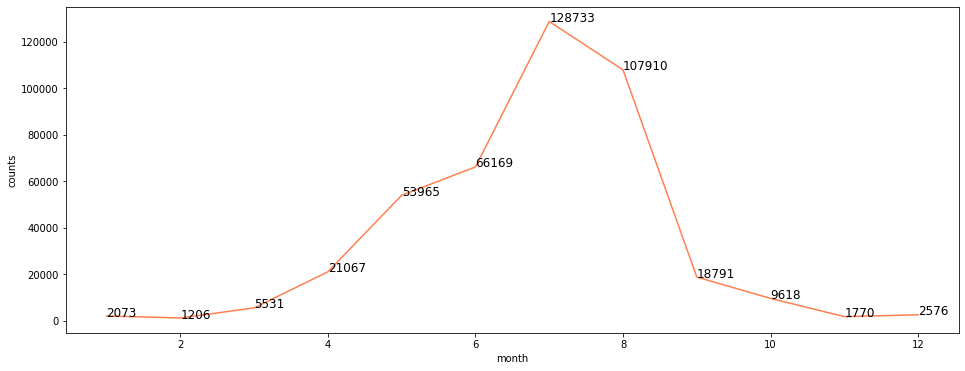

In [107]:
plt.figure(figsize=(16,6))
ax=sns.lineplot(x='month',y='counts', color="coral", data=value_counts,estimator=None,markers=True)
for x, y, text in zip(value_counts['month'],value_counts['counts'], value_counts['counts']):
    plt.text(x, y, text, fontsize= 12)
plt.savefig('month_flow.png', dpi=300, bbox_inches='tight')


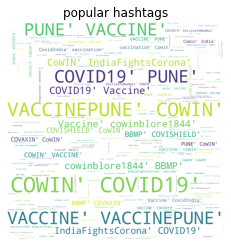

In [108]:
en_cowin["hashtag"]=en_cowin["hashtag"].astype(str)
wordcloud = WordCloud(height=2000, width=2000,stopwords=set(stopwords.words('english')), background_color='white')
wordcloud = wordcloud.generate(' '.join(en_cowin["hashtag"].tolist()))
plt.imshow(wordcloud)
plt.title("popular hashtags")
wordcloud.to_file("hashtag.png")

plt.axis('off')
plt.show()

In [116]:
en_cowin.columns

Index(['lang', 'quote_count', 'text', 'text_pr', 'hashtag', 'date', 'month'], dtype='object')

In [115]:
#let's drop created_at and save the file 
en_cowin.drop(columns=["created_at"], inplace= True)

In [117]:
en_cowin.to_csv("clean_cowin_jan_dec.csv")